In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
from statistics import mode

In [196]:
df= pd.read_csv('house-price/train.csv')

In [197]:
df.head(100)
df.shape

(1460, 81)

### Let's see how our SalesPrice is distributed

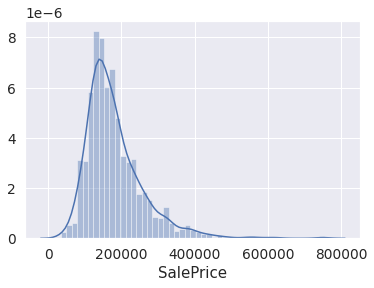

In [198]:
sns.distplot(df["SalePrice"])

#### That seems nice, We have a rightly skewed Guassian distribution here. Note it down

## Missing Values

In [199]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
missing_df=pd.DataFrame({"missing_feature": features_with_na, "miss_percentage": [df[i].isnull().sum()/df.shape[0] for i in features_with_na]})
missing_df

missing_feature  miss_percentage
0      LotFrontage         0.177397
1            Alley         0.937671
2       MasVnrType         0.005479
3       MasVnrArea         0.005479
4         BsmtQual         0.025342
5         BsmtCond         0.025342
6     BsmtExposure         0.026027
7     BsmtFinType1         0.025342
8     BsmtFinType2         0.026027
9      FireplaceQu         0.472603
10      GarageType         0.055479
11     GarageYrBlt         0.055479
12    GarageFinish         0.055479
13      GarageQual         0.055479
14      GarageCond         0.055479
15          PoolQC         0.995205
16           Fence         0.807534
17     MiscFeature         0.963014

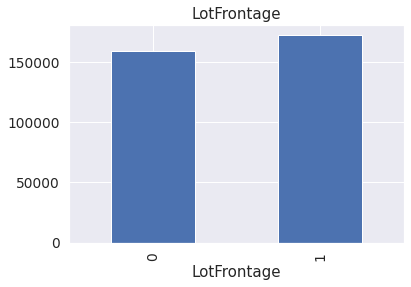

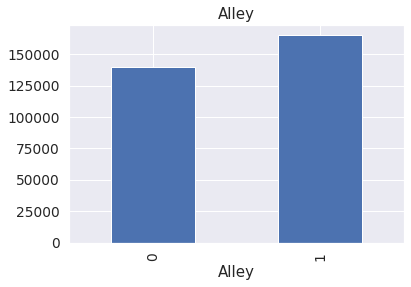

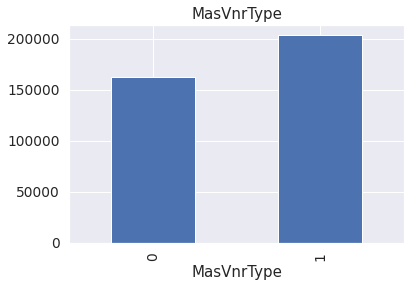

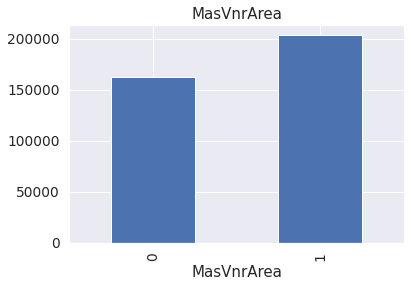

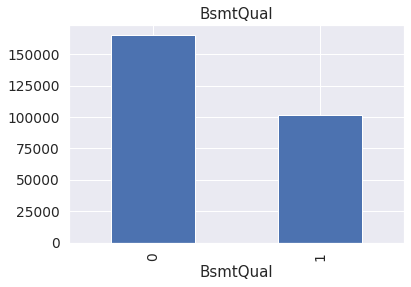

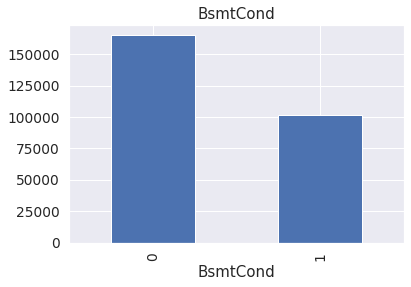

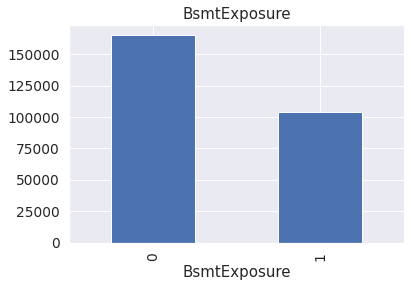

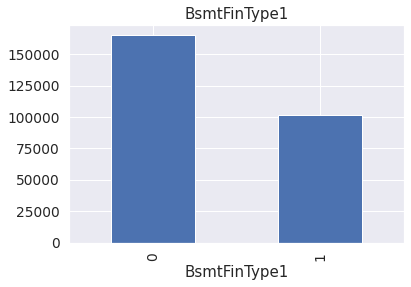

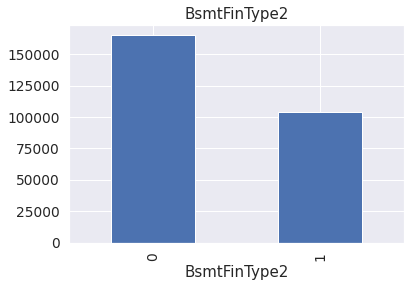

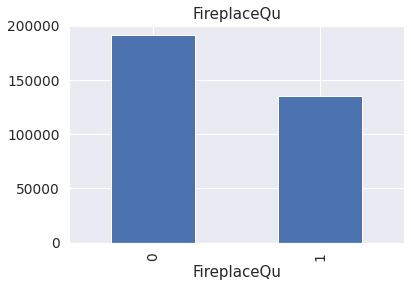

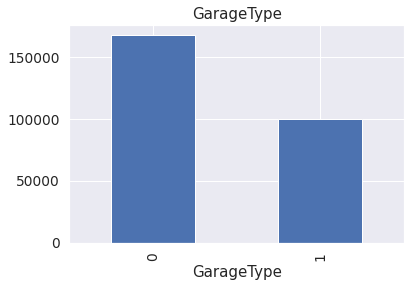

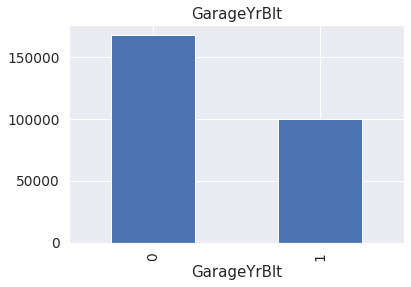

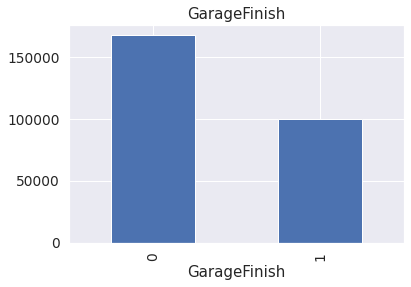

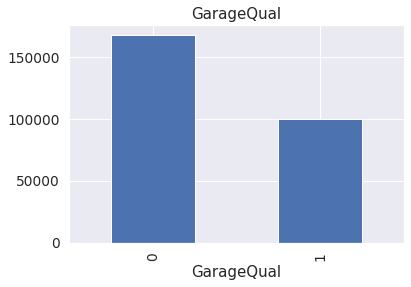

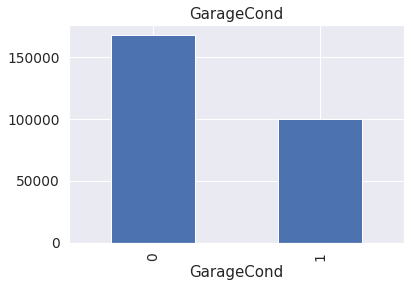

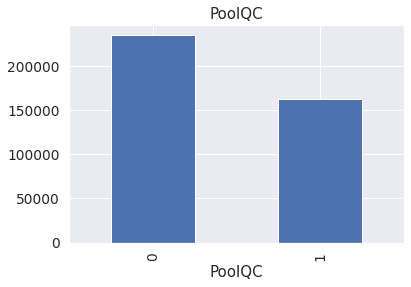

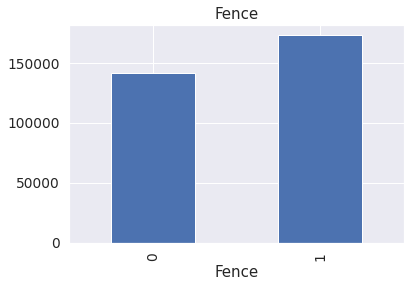

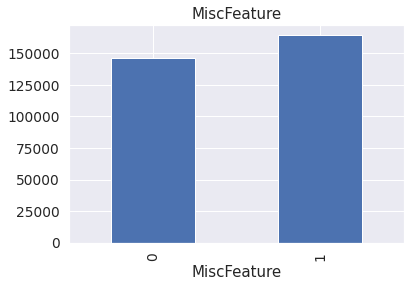

In [200]:
for feature in features_with_null:
    # let's mafor feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    

## Let us saperate out our numerical variables
### Numerical Features

In [201]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

### While doing so let's also draw Correlations, I find these Heatmaps very very useful.

In [202]:
cm=df[numerical_features].corr().values
cm

array([[  1.00000000e+00,   1.11564782e-02,  -1.06006886e-02, ...,
          2.11721766e-02,   7.11794017e-04,  -2.19167194e-02],
       [  1.11564782e-02,   1.00000000e+00,  -3.86346885e-01, ...,
         -1.35846432e-02,  -2.14070379e-02,  -8.42841351e-02],
       [ -1.06006886e-02,  -3.86346885e-01,   1.00000000e+00, ...,
          1.11999548e-02,   7.44958921e-03,   3.51799097e-01],
       ..., 
       [  2.11721766e-02,  -1.35846432e-02,   1.11999548e-02, ...,
          1.00000000e+00,  -1.45721413e-01,   4.64322452e-02],
       [  7.11794017e-04,  -2.14070379e-02,   7.44958921e-03, ...,
         -1.45721413e-01,   1.00000000e+00,  -2.89225852e-02],
       [ -2.19167194e-02,  -8.42841351e-02,   3.51799097e-01, ...,
          4.64322452e-02,  -2.89225852e-02,   1.00000000e+00]])

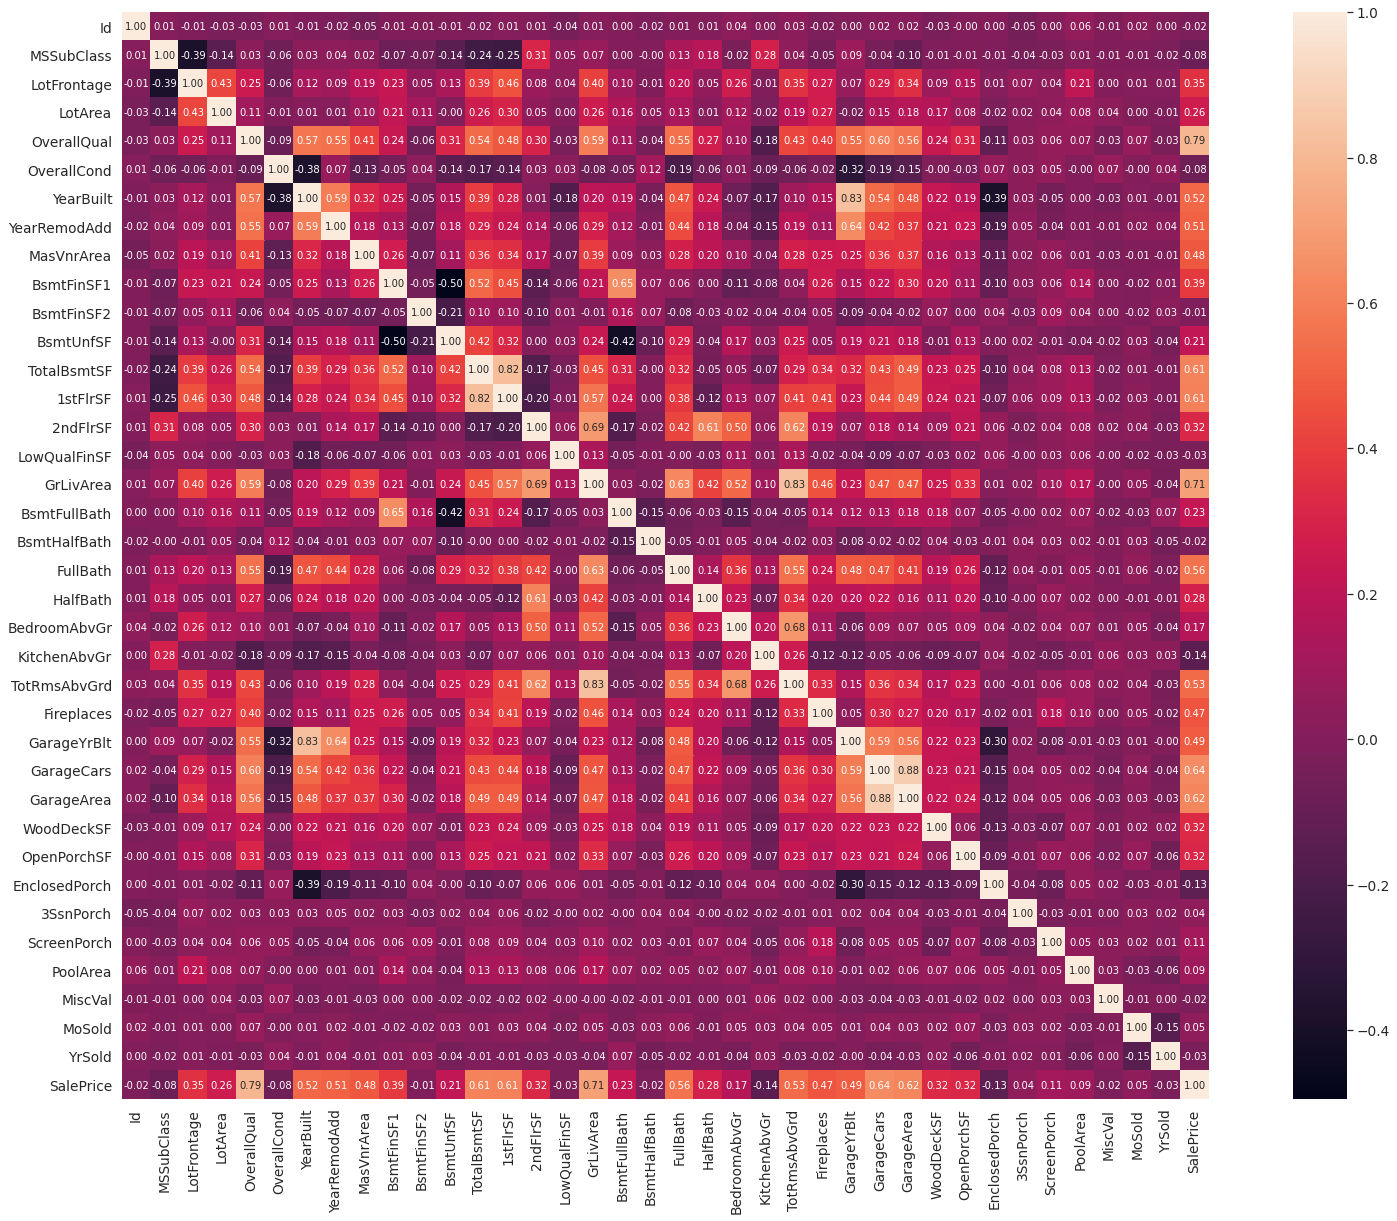

In [203]:
f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=numerical_features, xticklabels=numerical_features)
plt.show()

This tells a lot about the relationships our features are holding with each other

If we look carefully, Some features like OverallQual, GarageArea, GarageCars, GrLivArea, they have a very high correlation with our SalePrice feature.

### Temporal Variables(Eg: Datetime Variables)

In [204]:
Yrfeatures=[feature for feature in df.columns if any(["Yr" in feature, "Year" in feature])] #Taking the Year features
Yrfeatures

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

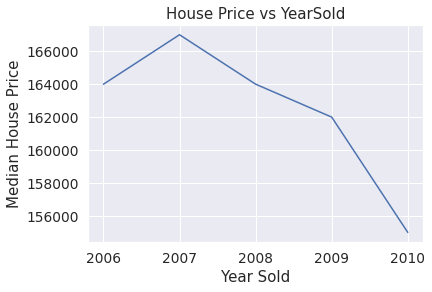

In [205]:
## Lets analyze the Temporal Datetime Variables
## Let us check whether there is a relation between year the house is sold and the sales price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

This is a strange behaviour to be honest because the newly house sold is expected to price more than the one sold earlier anyways,

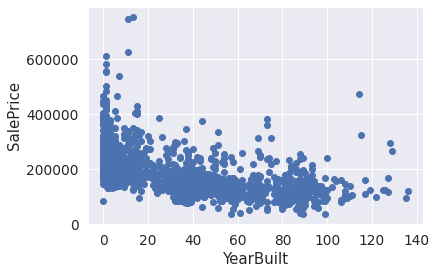

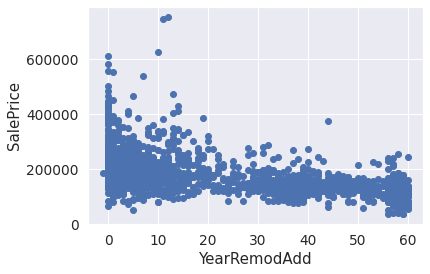

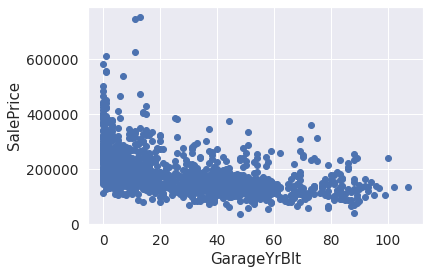

In [206]:
for feature in Yrfeatures:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

It can be seen that newly built or decorated houses have higher SalePrice

## Descrete Features

In [207]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in Yrfeatures+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [208]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

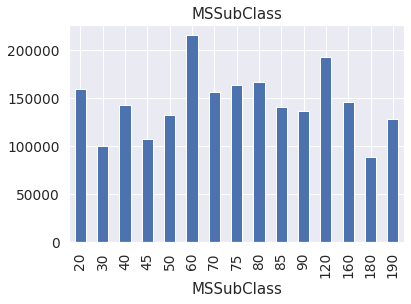

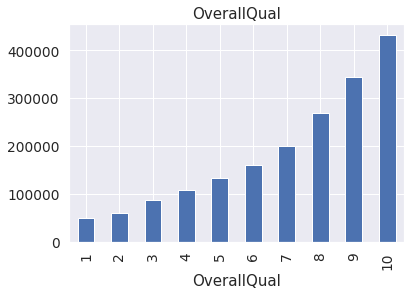

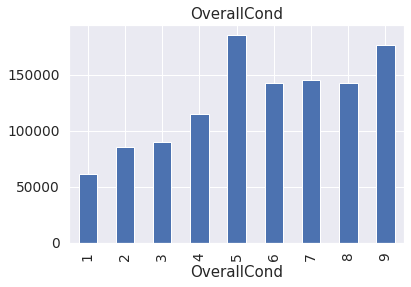

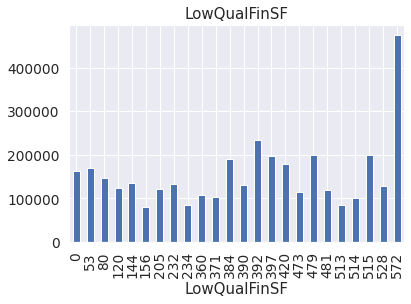

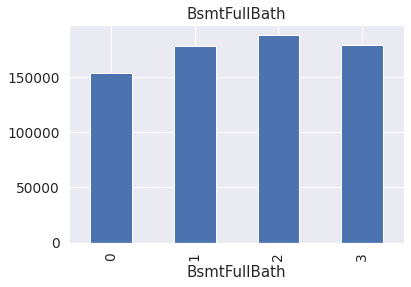

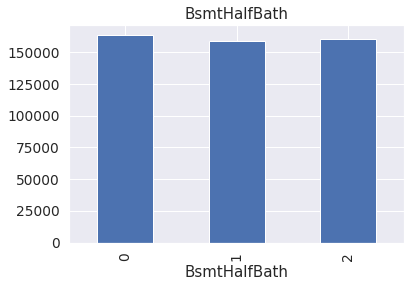

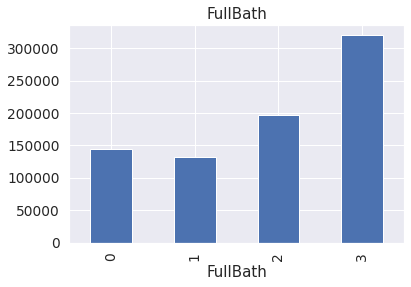

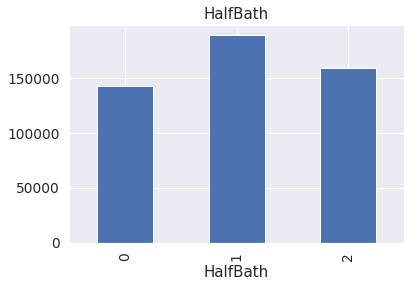

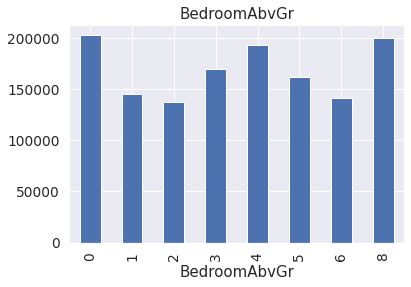

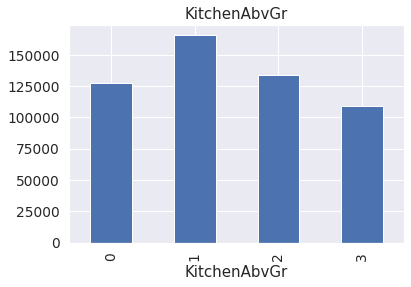

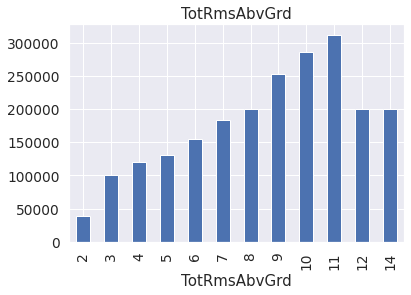

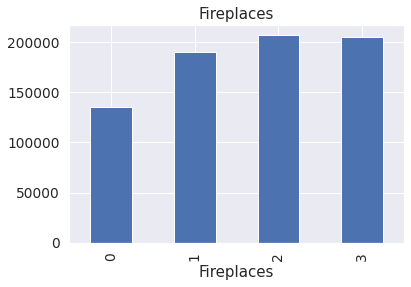

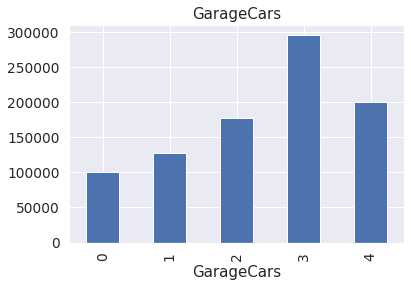

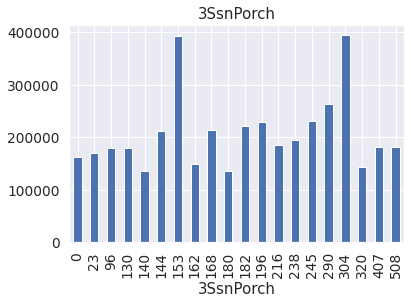

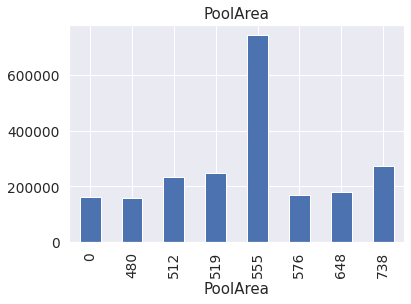

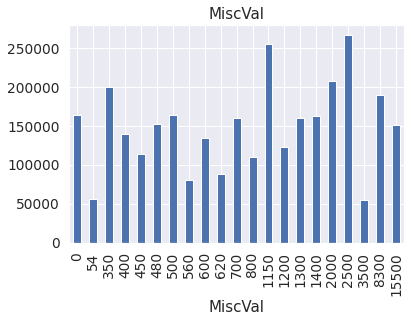

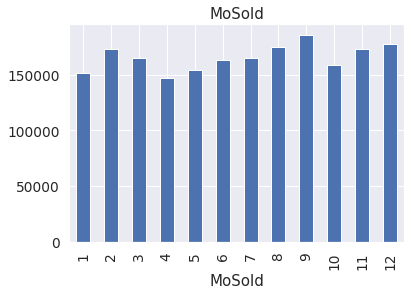

In [209]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

### Let us also look at our continous features

In [210]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+Yrfeatures+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


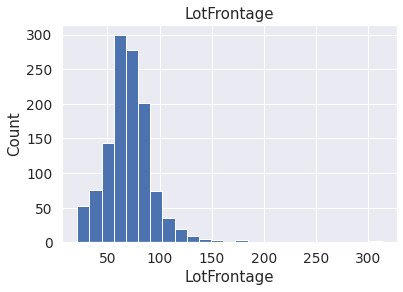

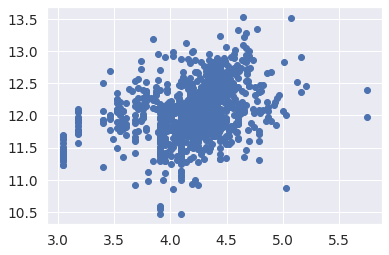

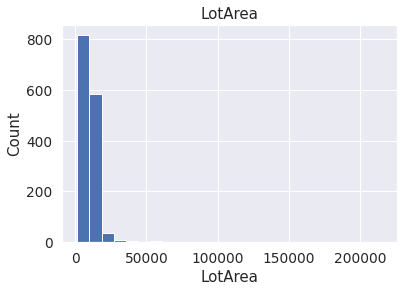

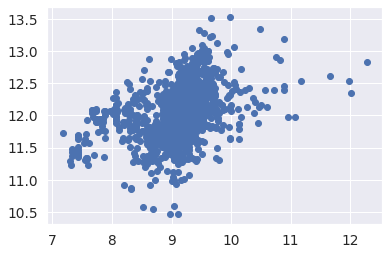

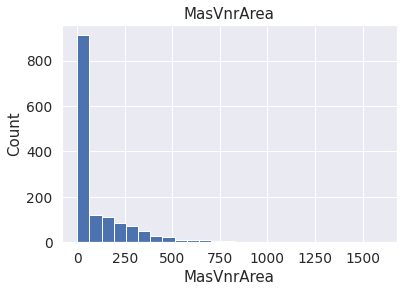

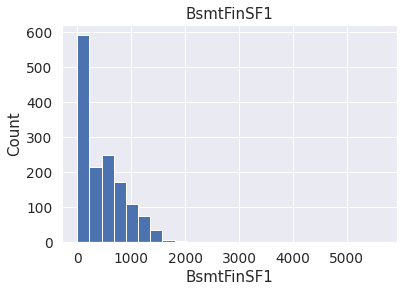

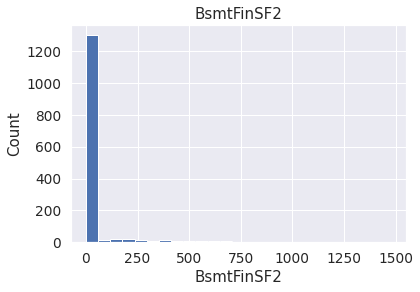

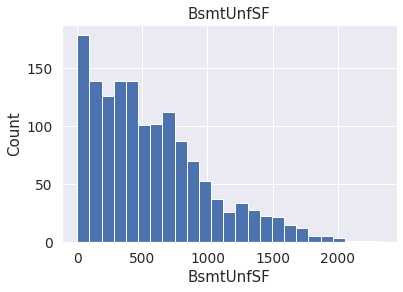

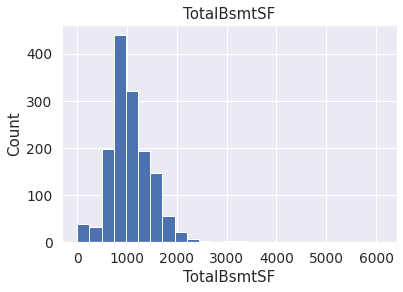

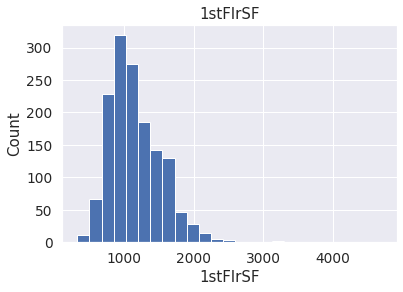

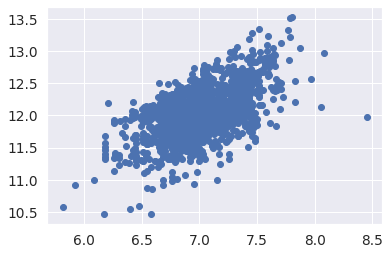

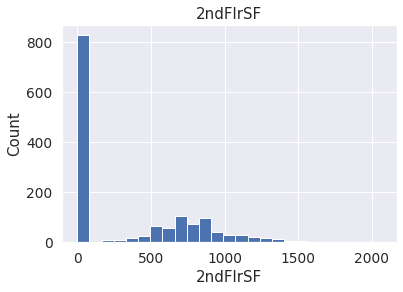

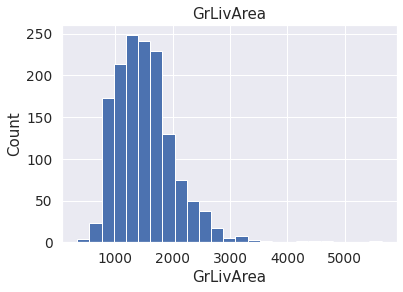

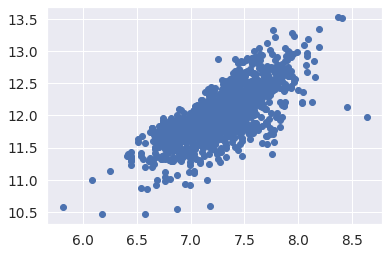

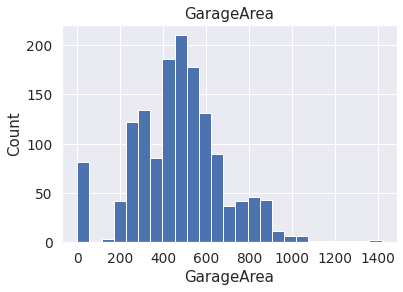

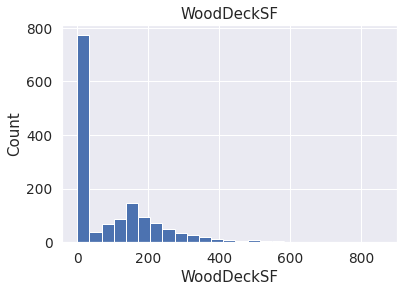

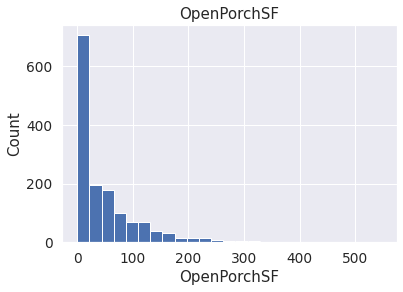

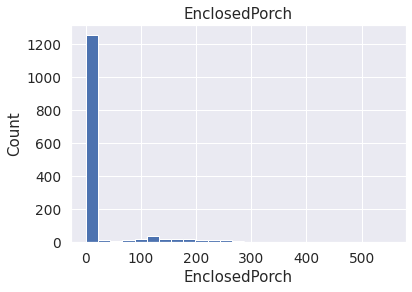

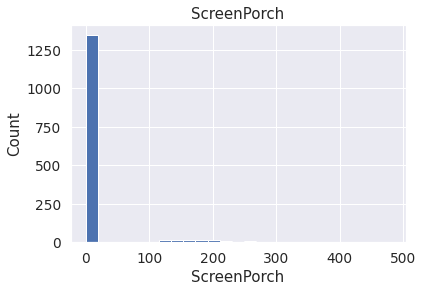

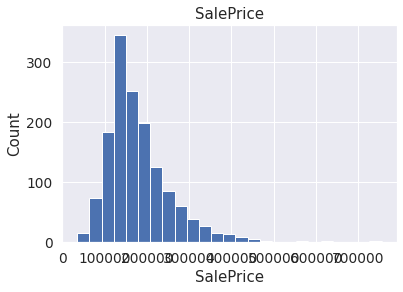

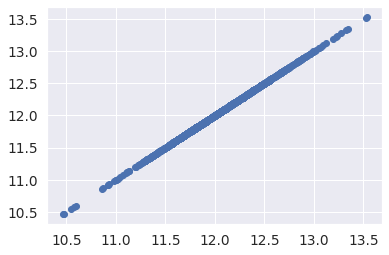

In [211]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    if 0 in data[feature].unique():
        pass
    else:
        plt.scatter(np.log(data[feature]), np.log(data["SalePrice"]))
        plt.show()

## Categorical Features

In [212]:
categorical_features=list(set(df.columns)-set(numerical_features))
print (f"Number of Categorical Features: {len(categorical_features)}")
df[categorical_features]

Number of Categorical Features: 43


BsmtExposure Utilities Exterior1st LandSlope MasVnrType Foundation  \
0              No    AllPub     VinylSd       Gtl    BrkFace      PConc   
1              Gd    AllPub     MetalSd       Gtl       None     CBlock   
2              Mn    AllPub     VinylSd       Gtl    BrkFace      PConc   
3              No    AllPub     Wd Sdng       Gtl       None     BrkTil   
4              Av    AllPub     VinylSd       Gtl    BrkFace      PConc   
...           ...       ...         ...       ...        ...        ...   
1455           No    AllPub     VinylSd       Gtl       None      PConc   
1456           No    AllPub     Plywood       Gtl      Stone     CBlock   
1457           No    AllPub     CemntBd       Gtl       None      Stone   
1458           Mn    AllPub     MetalSd       Gtl       None     CBlock   
1459           No    AllPub     HdBoard       Gtl       None     CBlock   

     GarageQual Electrical GarageType Alley ExterCond BsmtCond PoolQC  \
0            TA      SBrkr     Attchd   NaN        TA       TA    NaN   
1            TA      SBrkr     Attchd   NaN        TA       TA    NaN   
2            TA      SBrkr     Attchd   NaN        TA       TA    NaN   
3            TA      SBrkr     Detchd   NaN        TA       Gd    NaN   
4            TA      SBrkr     Attchd   NaN        TA       TA    NaN   
...         ...        ...        ...   ...       ...      ...    ...   
1455         TA      SBrkr     Attchd   NaN        TA       TA    NaN   
1456         TA      SBrkr     Attchd   NaN        TA       TA    NaN   
1457         TA      SBrkr     Attchd   NaN        Gd       Gd    NaN   
1458         TA      FuseA     Attchd   NaN        TA       TA    NaN   
1459         TA      SBrkr     Attchd   NaN        TA       TA    NaN   

     MSZoning Street SaleCondition Exterior2nd BsmtQual SaleType RoofMatl  \
0          RL   Pave        Normal     VinylSd       Gd       WD  CompShg   
1          RL   Pave        Normal     MetalSd       Gd       WD  CompShg   
2          RL   Pave        Normal     VinylSd       Gd       WD  CompShg   
3          RL   Pave       Abnorml     Wd Shng       TA       WD  CompShg   
4          RL   Pave        Normal     VinylSd       Gd       WD  CompShg   
...       ...    ...           ...         ...      ...      ...      ...   
1455       RL   Pave        Normal     VinylSd       Gd       WD  CompShg   
1456       RL   Pave        Normal     Plywood       Gd       WD  CompShg   
1457       RL   Pave        Normal     CmentBd       TA       WD  CompShg   
1458       RL   Pave        Normal     MetalSd       TA       WD  CompShg   
1459       RL   Pave        Normal     HdBoard       TA       WD  CompShg   

     LotConfig GarageCond HouseStyle Condition1 ExterQual MiscFeature  \
0       Inside         TA     2Story       Norm        Gd         NaN   
1          FR2         TA     1Story      Feedr        TA         NaN   
2       Inside         TA     2Story       Norm        Gd         NaN   
3       Corner         TA     2Story       Norm        TA         NaN   
4          FR2         TA     2Story       Norm        Gd         NaN   
...        ...        ...        ...        ...       ...         ...   
1455    Inside         TA     2Story       Norm        TA         NaN   
1456    Inside         TA     1Story       Norm        TA         NaN   
1457    Inside         TA     2Story       Norm        Ex        Shed   
1458    Inside         TA     1Story       Norm        TA         NaN   
1459    Inside         TA     1Story       Norm        Gd         NaN   

     KitchenQual RoofStyle HeatingQC BsmtFinType2 Heating BsmtFinType1  \
0             Gd     Gable        Ex          Unf    GasA          GLQ   
1             TA     Gable        Ex          Unf    GasA          ALQ   
2             Gd     Gable        Ex          Unf    GasA          GLQ   
3             Gd     Gable        Gd          Unf    GasA          ALQ   
4             Gd     Gable        Ex          Unf    Ga

In [213]:
Categories_df=pd.DataFrame({"feature":categorical_features, "categories": [len(df[i].unique()) for i in categorical_features]})
Categories_df

feature  categories
0    BsmtExposure           5
1       Utilities           2
2     Exterior1st          15
3       LandSlope           3
4      MasVnrType           5
5      Foundation           6
6      GarageQual           6
7      Electrical           6
8      GarageType           7
9           Alley           3
10      ExterCond           5
11       BsmtCond           5
12         PoolQC           4
13       MSZoning           5
14         Street           2
15  SaleCondition           6
16    Exterior2nd          16
17       BsmtQual           5
18       SaleType           9
19       RoofMatl           8
20      LotConfig           5
21     GarageCond           6
22     HouseStyle           8
23     Condition1           9
24      ExterQual           4
25    MiscFeature           5
26    KitchenQual           4
27      RoofStyle           6
28      HeatingQC           5
29   BsmtFinType2           7
30        Heating           6
31   BsmtFinType1           7
32     PavedDrive           3
33          Fence           5
34     Functional           7
35     Condition2           8
36       LotShape           4
37   Neighborhood          25
38   GarageFinish           4
39       BldgType           5
40    FireplaceQu           6
41     CentralAir           2
42    LandContour           4

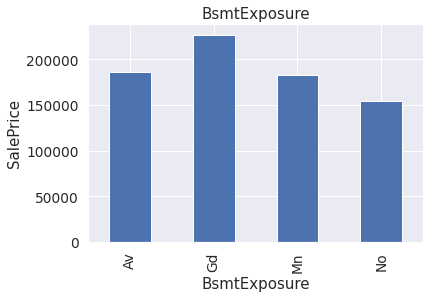

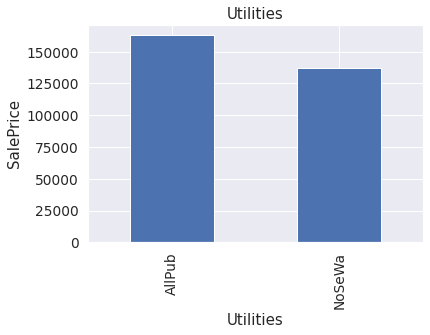

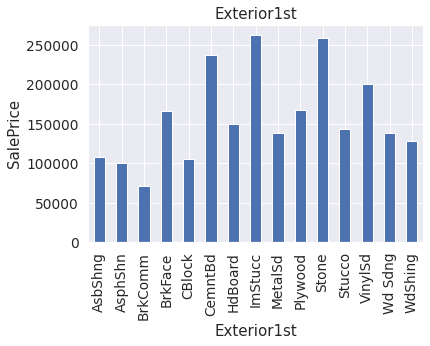

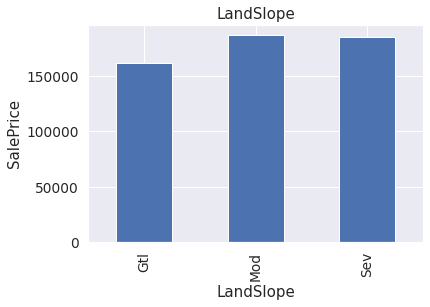

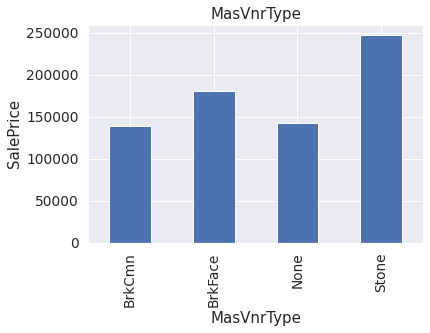

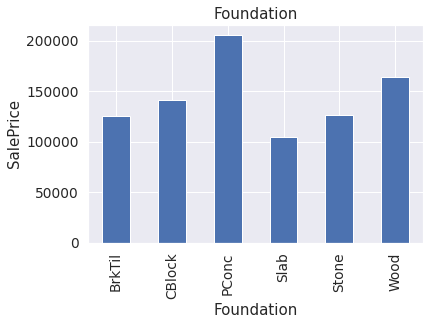

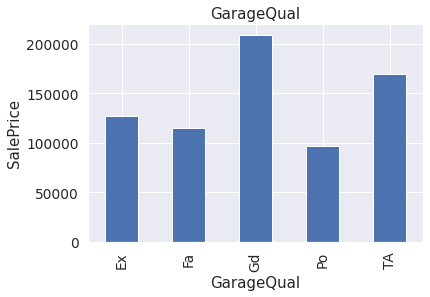

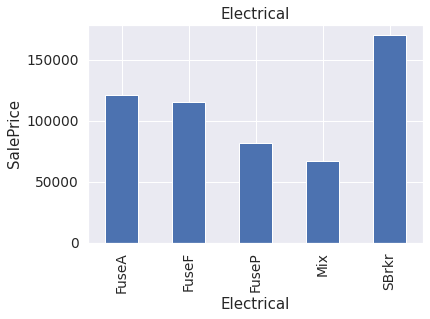

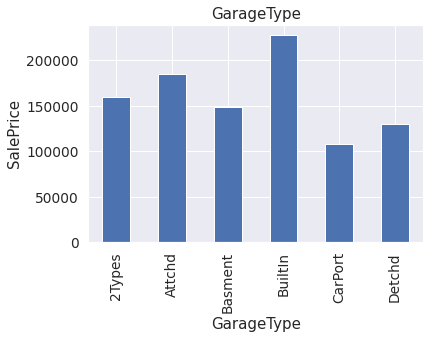

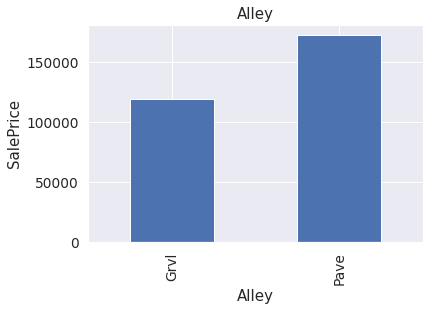

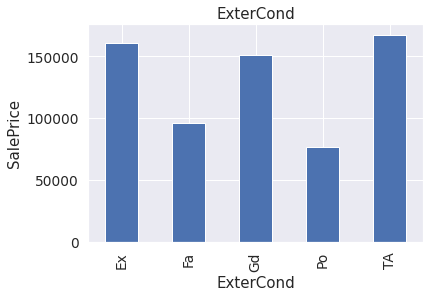

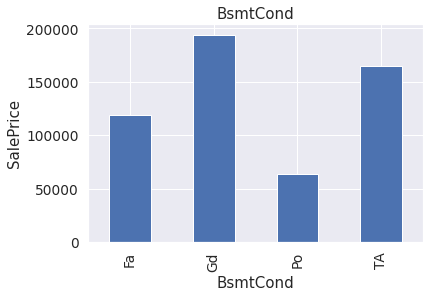

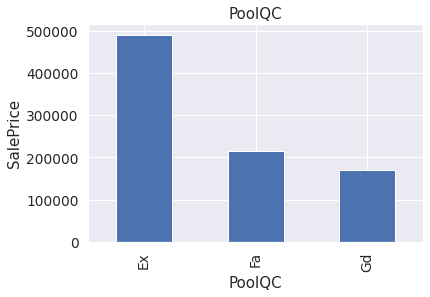

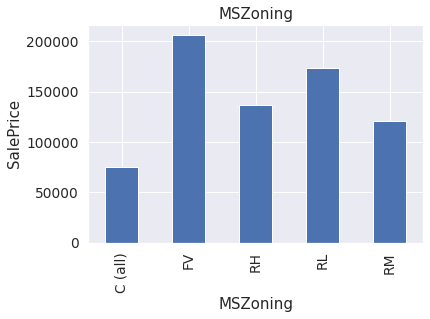

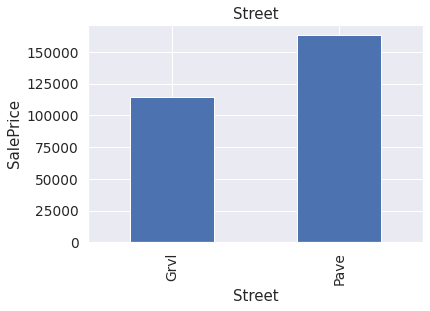

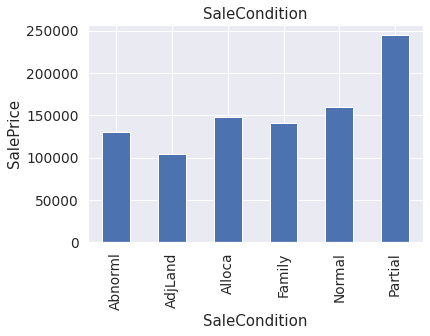

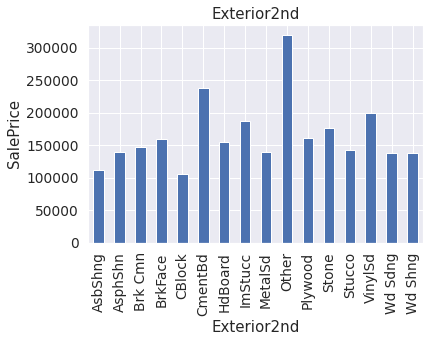

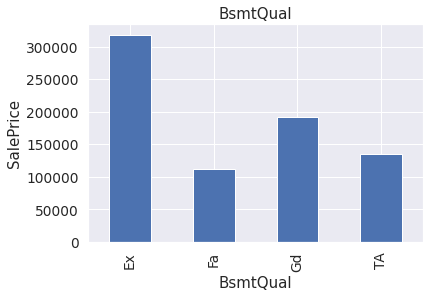

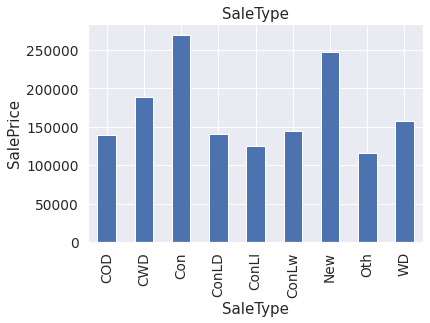

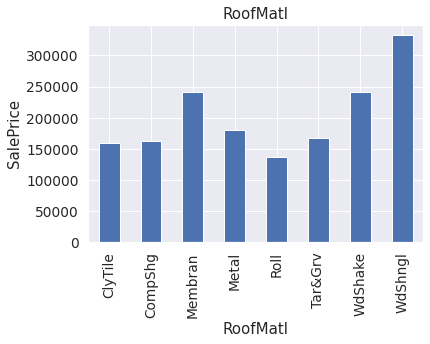

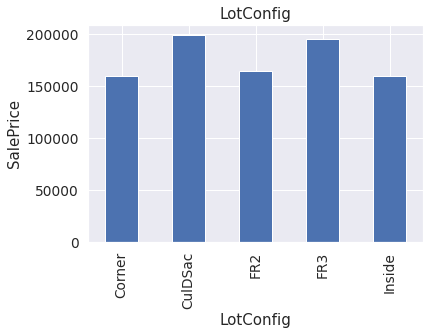

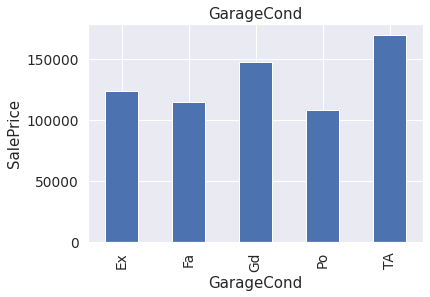

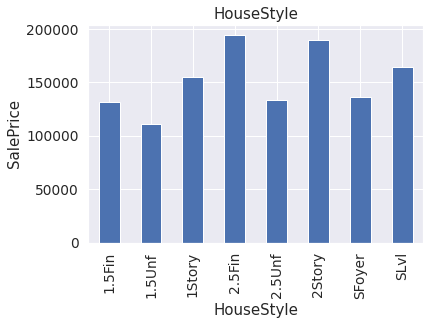

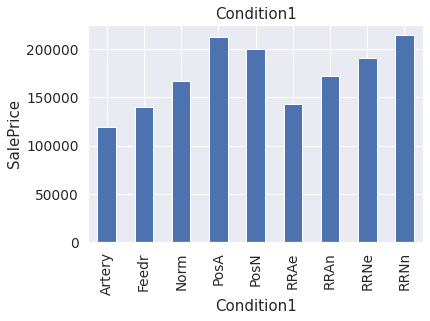

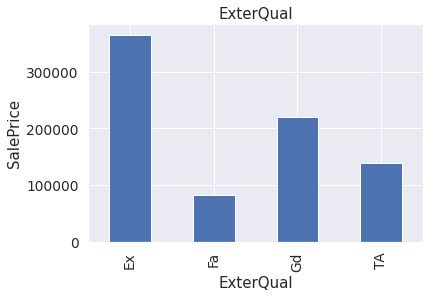

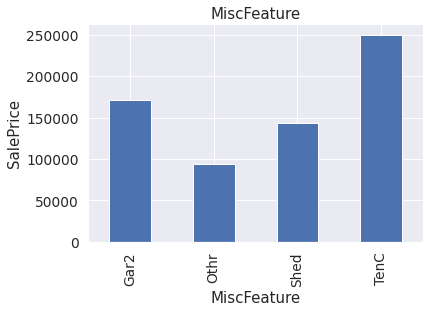

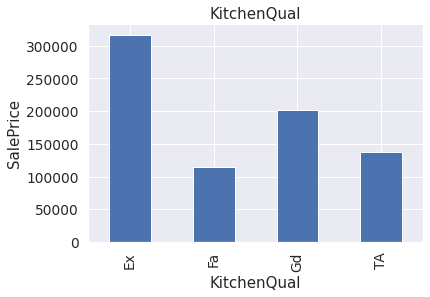

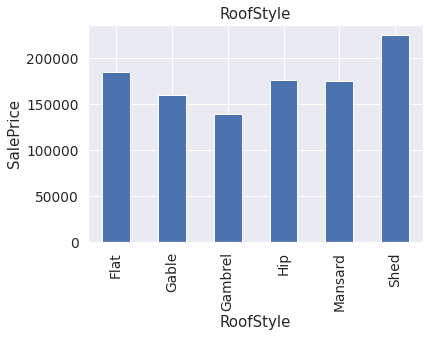

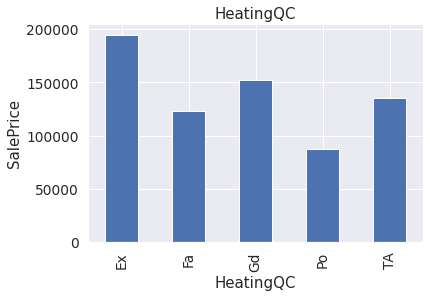

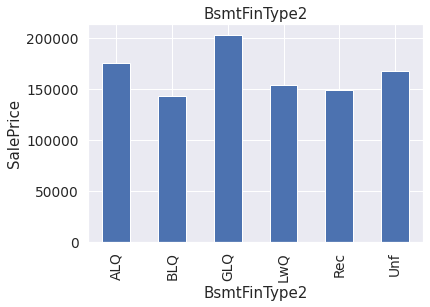

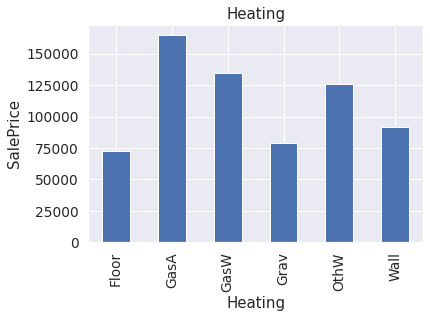

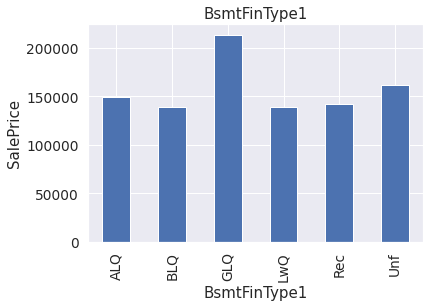

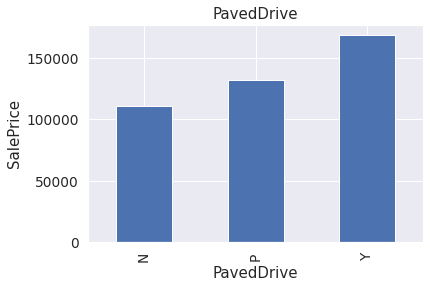

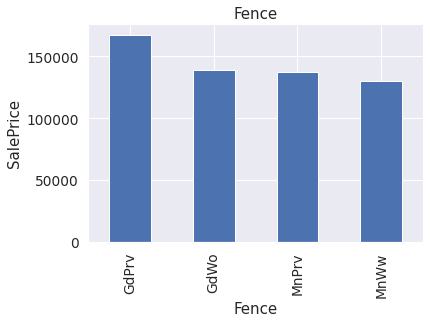

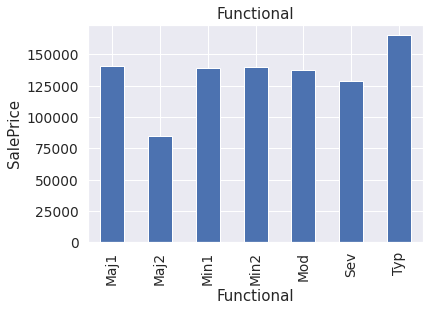

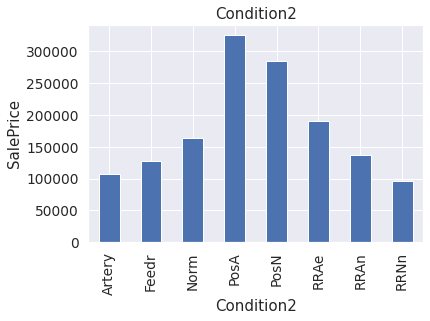

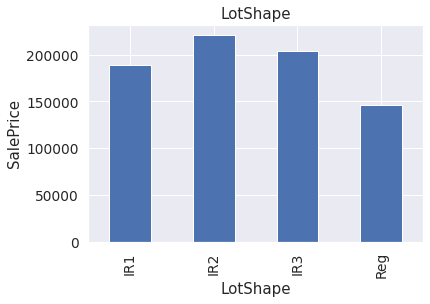

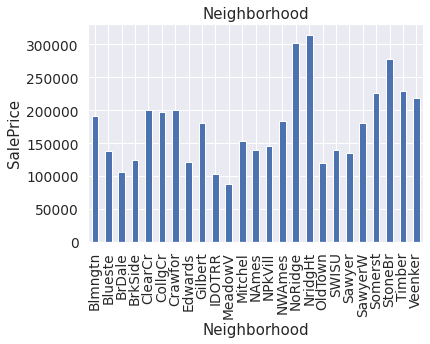

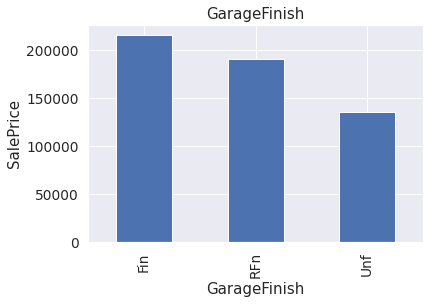

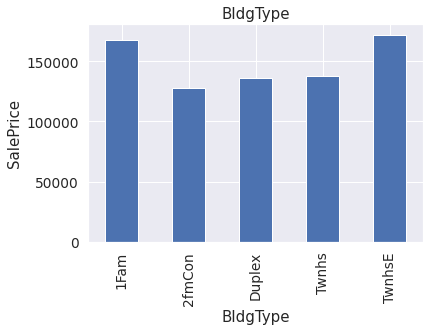

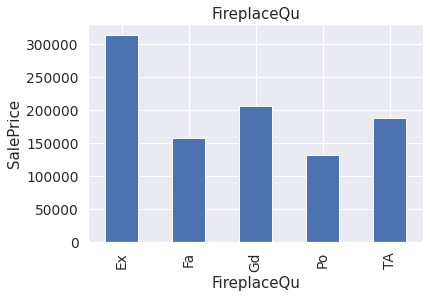

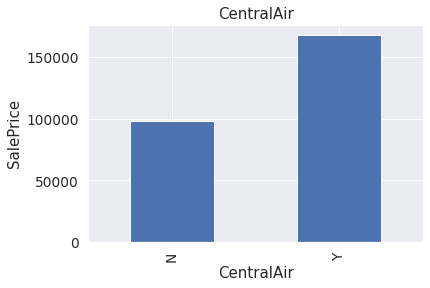

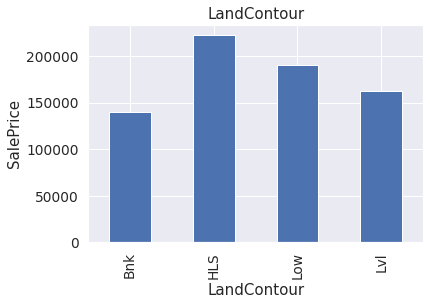

In [214]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Let us look at the Outliers now

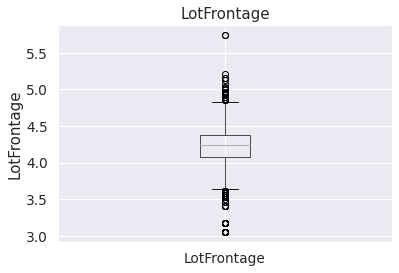

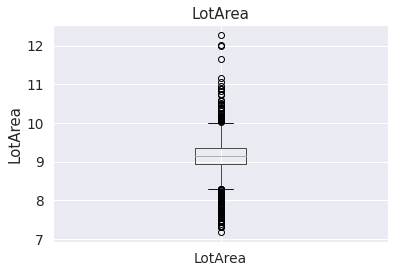

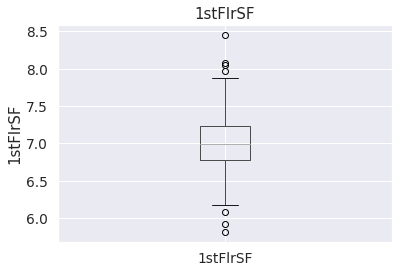

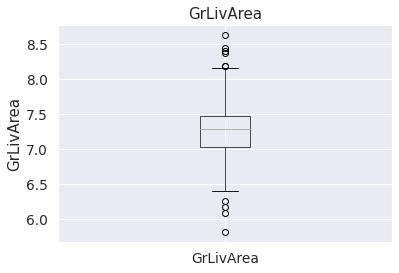

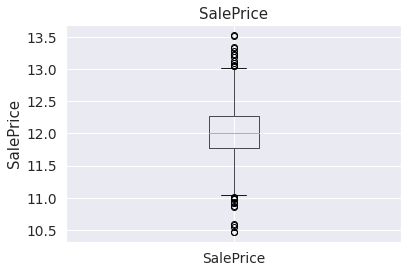

In [215]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Let's do some feature engieering now.

## Missing Values

When We have outliers present, Using median makes sense because of it.

In [216]:
features_with_null=[feature for feature in df.columns if df[feature].isnull().sum()>1]
missing_per=[df[feature].isnull().mean() for feature in features_with_null]
missing_data=pd.Series(missing_per, index= features_with_null)


In [217]:
missing_data
#Let's see the percentage missing

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [218]:
[df[feature].dtype for feature in features_with_null]

[dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

Basically most of the data that is missing belong to categorical variables

In [219]:
numerical_nan=[feature for feature in features_with_na if df[feature].dtype!='O']
categorical_nan= list(set(features_with_na)-set(numerical_nan))
categorical_nan, numerical_nan

(['BsmtExposure',
  'MiscFeature',
  'MasVnrType',
  'BsmtFinType2',
  'GarageQual',
  'BsmtFinType1',
  'Fence',
  'Alley',
  'GarageType',
  'BsmtCond',
  'GarageFinish',
  'PoolQC',
  'FireplaceQu',
  'BsmtQual',
  'GarageCond'],
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

Let's categorize out missing data

In [220]:
highly_missing=missing_data[missing_data>=0.5]
highly_missing


Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

## These columns have really high number of missing values it would be wise really if we remove them but ...
If we look carefully it seems like most of the houses do not have these features and that is why the values are missing. Let's draw the relationships between these columns to our SalePrice to see if we can do aything about it

In [221]:
for i in highly_missing.index:
    print (df[i].unique())

[nan 'Grvl' 'Pave']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


Alley
object


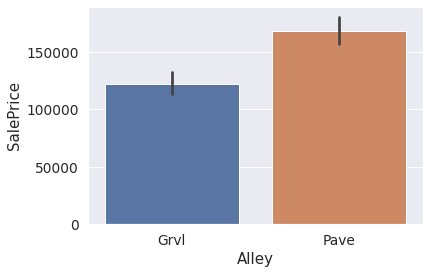

PoolQC
object


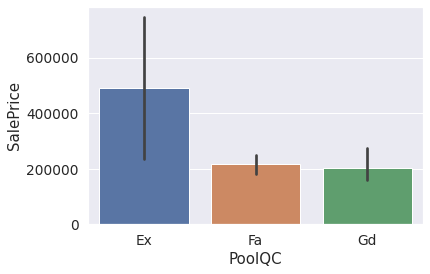

Fence
object


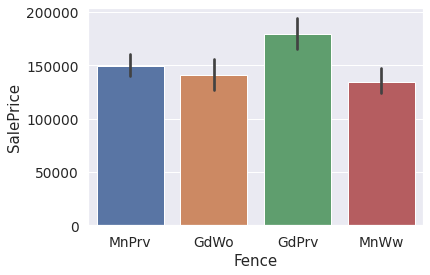

MiscFeature
object


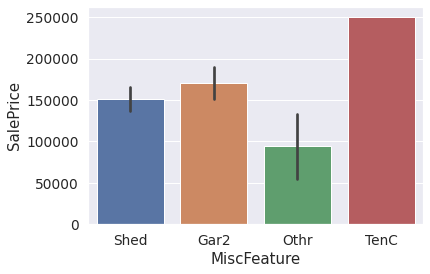

In [222]:
for i in highly_missing.index:
    print (i)
    print (df[i].dtype) #Let's check their type first
    sns.barplot(x=i, y="SalePrice", data=df)
    plt.show()

I was thinking I could get someting out of it but looking at these graphs, I don't think I can really come to any conslusion because very less data is available.
## Removing highly missing variables

In [223]:
df=df.drop(highly_missing.index, axis=1)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
..

## Before replacing other missing values, let's create new columns to keep track of out missing data

In [224]:
missing_features=list(set(features_with_null)-set(highly_missing.index))#updating missing features
missing_features
categorical_nan=list(set(categorical_nan)-set(highly_missing.index))
categorical_features=list(set(categorical_features)-set(highly_missing.index))

In [225]:
dataset=df.copy()
for feature in missing_features:
    dataset[feature+'_nan']=np.where(df[feature].isnull(), 1, 0)
dataset.shape

(1460, 91)

## I think it's time to fill those missing values

In [226]:
yr_features= [i for i in df.columns if any(['Yr' in i, 'Year' in i])]
yr_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [227]:
for i in yr_features[:-1]:
    df[i]=df['YrSold']-df[i]
df[yr_features] 

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0             5             5          5.0    2008
1            31            31         31.0    2007
2             7             6          7.0    2008
3            91            36          8.0    2006
4             8             8          8.0    2008
...         ...           ...          ...     ...
1455          8             7          8.0    2007
1456         32            22         32.0    2010
1457         69             4         69.0    2010
1458         60            14         60.0    2010
1459         43            43         43.0    2008

[1460 rows x 4 columns]

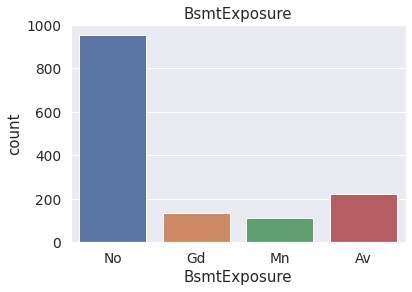

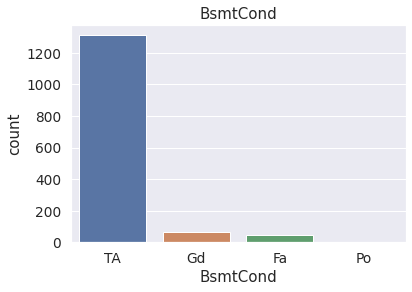

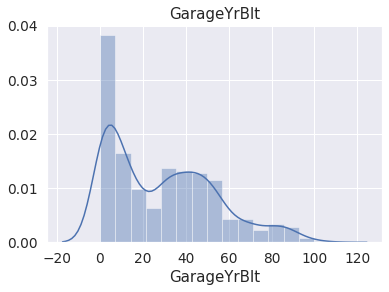

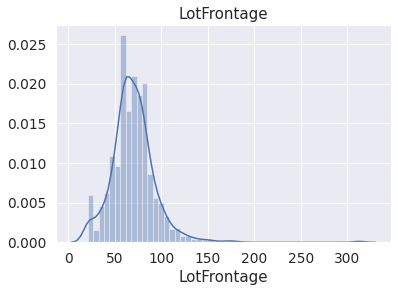

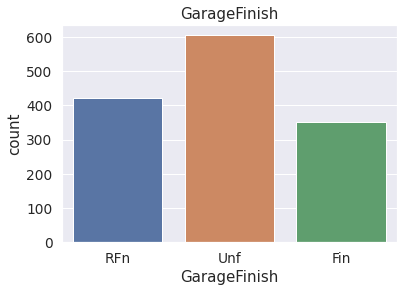

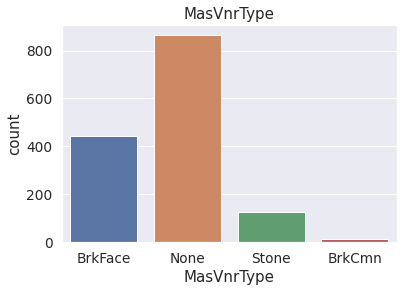

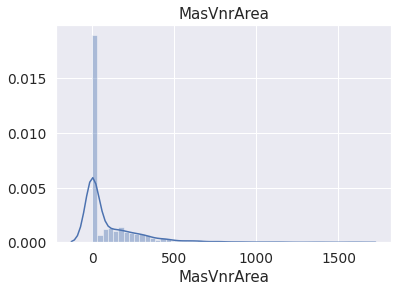

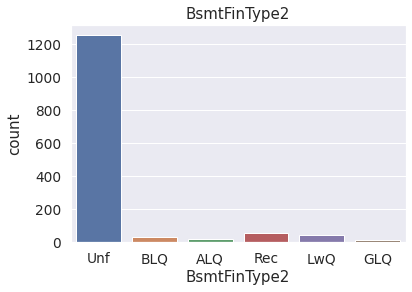

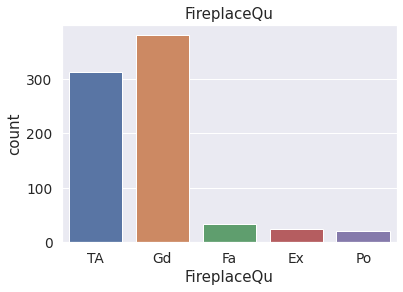

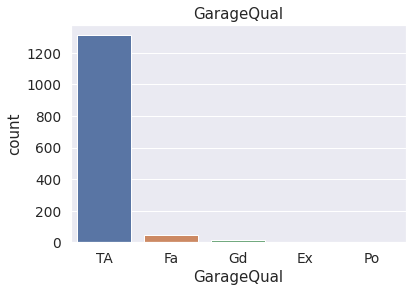

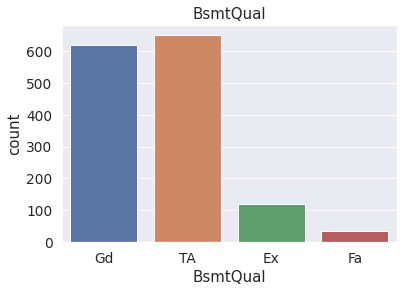

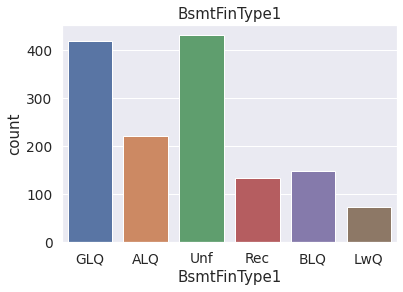

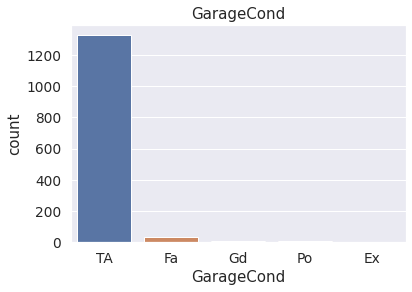

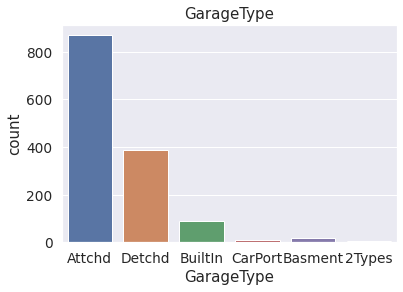

In [228]:
#Let's first take a magnifying look at them
for feature in missing_features:
    try:
        sns.distplot(df[feature])
        plt.title(feature)
        plt.show()
    except:
        sns.countplot(df[feature])
        plt.title(feature)
        plt.show()
        
        

Thanks to Seaborn, There seem to be some features where missing values should be filled with mode value like BsmtFinType2, BsmtCond, GarageType, GarageQual, BsmtExposure, MassVnrArea, GarageCond

In [229]:
df["BsmtFinType2"].fillna("Unf", inplace=True)
df["BsmtCond"].fillna("TA", inplace=True)
df["GarageType"].fillna("Attchd", inplace=True)
df["GarageQual"].fillna("TA", inplace=True)
df["BsmtExposure"].fillna("No", inplace=True)
df["MasVnrArea"].fillna(mode(df["MasVnrArea"]), inplace=True)
df["GarageCond"].fillna("TA", inplace=True)
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrType"].fillna(mode(df["MasVnrType"]), inplace=True)

In [230]:
missing=[feature for feature in df.columns if df[feature].isnull().sum()>1]
missing #Columns which are still missing

['BsmtQual', 'BsmtFinType1', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish']

In [231]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(), inplace=True)
df=df.drop(['GarageFinish'], axis=1)


In [232]:
df.columns.isnull()
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(), inplace=True)

still_missing=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for i in still_missing:
    df[i].fillna('Missing', inplace=True)

In [233]:
[feature for feature in df.columns if df[feature].isnull().sum()>1]
categorical_features.remove('GarageFinish')

### Nothing is missing now

Let's perform log normal distribution to our skewed continous distribution 

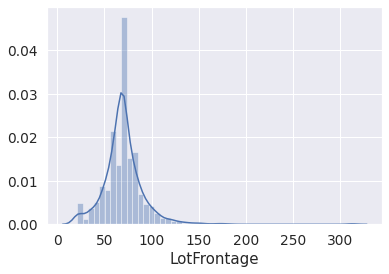

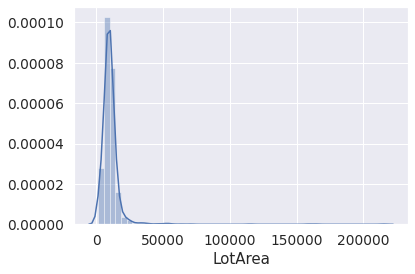

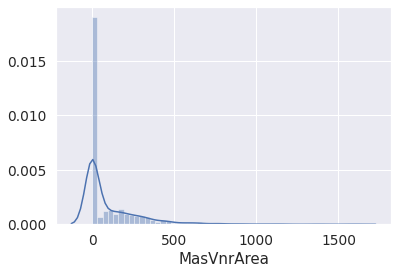

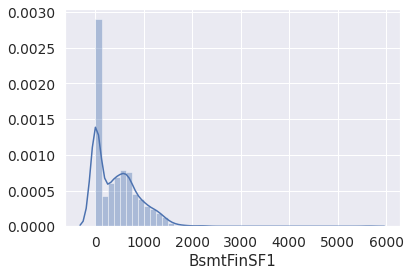

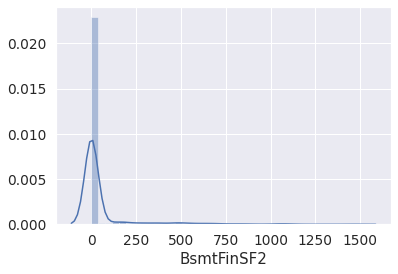

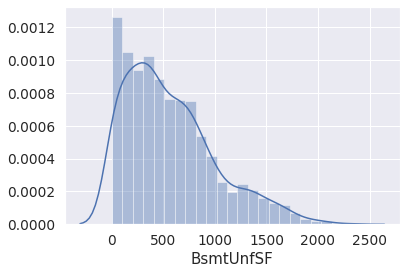

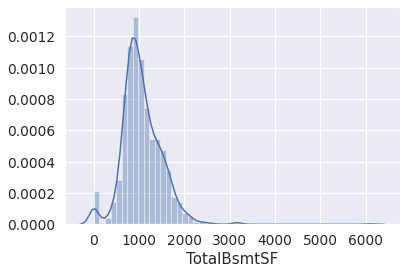

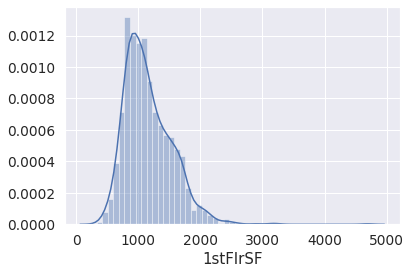

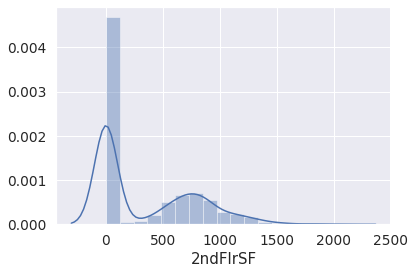

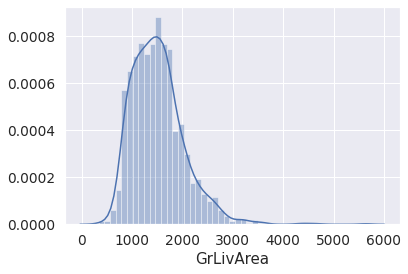

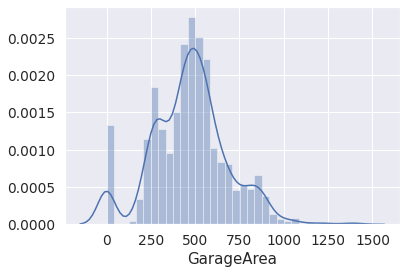

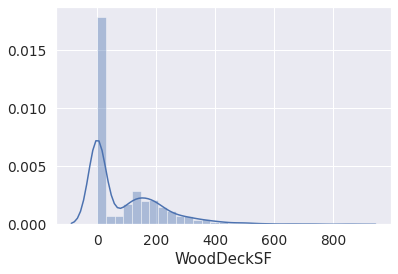

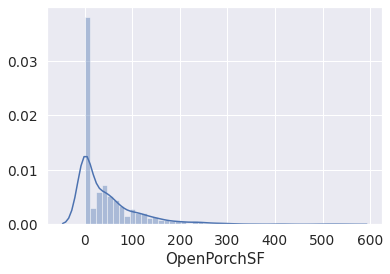

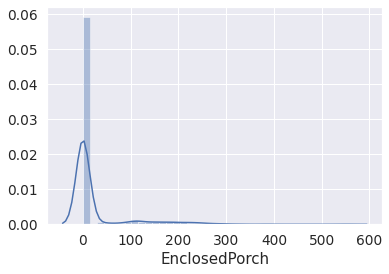

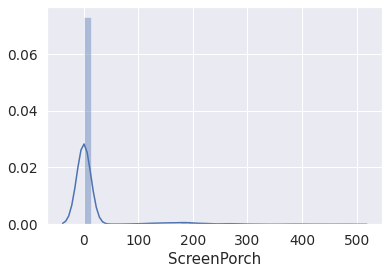

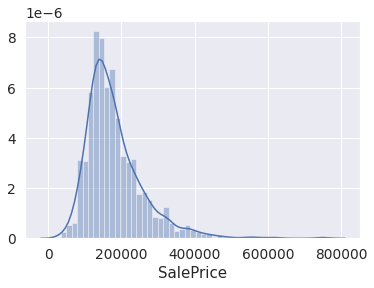

In [234]:
for feature in continuous_feature:
    sns.distplot(df[feature])
    plt.show()

In [235]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [236]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0     Missing     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [237]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=dataset[feature].map(labels_ordered)


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         3         65.0     8450       1         0   
1        2          20         3         80.0     9600       1         0   
2        3          60         3         68.0    11250       1         1   
3        4          70         3         60.0     9550       1         1   
4        5          60         3         84.0    14260       1         1   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60         3         62.0     7917       1         0   
1456  1457          20         3         85.0    13175       1         0   
1457  1458          70         3         66.0     9042       1         0   
1458  1459          20         3         68.0     9717       1         0   
1459  1460          20         3         75.0     9937       1         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               1          1          0          0            16           4   
1               1          1          1          0            20           2   
2               1          1          0          0            16           4   
3               1          1          2          0            17           4   
4               1          1          1          0            24           4   
...           ...        ...        ...        ...           ...         ...   
1455            1          1          0          0            14           4   
1456            1          1          0          0            13           4   
1457            1          1          0          0            17           4   
1458            1          1          0          0            10           4   
1459            1          1          0          0             4           4   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              4         4           6            7            5          5   
1              4         4           5            6            8         31   
2              4         4           6            7            5          7   
3              4         4           6            7            5         91   
4              4         4           6            8            5          8   
...          ...       ...         ...          ...          ...        ...   
1455           4         4           6            6            5          8   
1456           4         4           5            6            6         32   
1457           4         4           6            7            9         69   
1458           4         4           5            5            6         60   
1459           4         4           5            5            6         43   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0                5          1         2           11           12         2.0   
1               31          1         2            4            5         1.0   
2                6          1         2           11           12         2.0   
3               36          1         2            5            8         1.0   
4                8          1         2           11           12         2.0   
...            ...        ...       ...          ...          ...         ...   
1455             7          1         2           11           12         1.0   
1456            22          1         2            9           10         3.0   
1457             4          1         2           12           13         1.0   
1458            14          4         2            4            5         1.0   
1459            43          1         2            8            9         1.0   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          196.0          2          3           5       3.0       2.0   
1            0.0          1          3           2       3.0    

In [238]:
df.head(10)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         0   
1   2          20         3         80.0     9600       1         0   
2   3          60         3         68.0    11250       1         1   
3   4          70         3         60.0     9550       1         1   
4   5          60         3         84.0    14260       1         1   
5   6          50         3         85.0    14115       1         1   
6   7          20         3         75.0    10084       1         0   
7   8          60         3         69.0    10382       1         1   
8   9          50         1         51.0     6120       1         0   
9  10         190         3         50.0     7420       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            16           4   
1            1          1          1          0            20           2   
2            1          1          0          0            16           4   
3            1          1          2          0            17           4   
4            1          1          1          0            24           4   
5            1          1          0          0            11           4   
6            1          1          0          0            19           4   
7            1          1          2          0            13           7   
8            1          1          0          0             5           0   
9            1          1          2          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         4           6            7            5          5   
1           4         4           5            6            8         31   
2           4         4           6            7            5          7   
3           4         4           6            7            5         91   
4           4         4           6            8            5          8   
5           4         4           2            5            5         16   
6           4         4           5            8            5          3   
7           4         4           6            7            6         36   
8           4         4           2            7            5         77   
9           1         0           0            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          1         2           11           12         2.0   
1            31          1         2            4            5         1.0   
2             6          1         2           11           12         2.0   
3            36          1         2            5            8         1.0   
4             8          1         2           11           12         2.0   
5            14          1         2           11           12         1.0   
6             2          1         2           11           12         3.0   
7            36          1         2            8            9         3.0   
8            58          1         2           10            8         1.0   
9            58          1         2            4            5         1.0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5       3.0       2.0   
1         0.0          1          3           2       3.0       2.0   
2       162.0          2          3           5       3.0       2.0   
3         0.0          1          3           1       2.0       3.0   
4       350.0          2          3           5       3.0       2.0   
5         0.0          1          3           4       3.0       2.0   
6       186.0          2          3           5       4.0       2.0   
7       240.0          1          3           2       3.0       2.0   
8         0.0          1          3   